In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import statsmodels.formula.api as smf
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Import

In [ ]:
import os 
os.getcwd()

'C:\\Users\\hy11\\Downloads'

In [ ]:
os.chdir("C:\\Users\\hy11\\Downloads")
os.getcwd()

'C:\\Users\\hy11\\Downloads'

In [2]:
filename = 'https://raw.githubusercontent.com/cyrus723/my-first-binder/main/factsets_etf.csv'  

In [3]:
data = pd.read_csv(filename)  

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  1893 non-null   object 
 1   name    1893 non-null   object 
 2   issuer  1893 non-null   object 
 3   exp     1893 non-null   float64
 4   nav     1893 non-null   float64
 5   aum     1893 non-null   float64
 6   class   1893 non-null   object 
 7   beta    1893 non-null   float64
dtypes: float64(4), object(4)
memory usage: 118.4+ KB


In [5]:
data['scaled_aum'] = np.log(data['aum']/1000000)

In [6]:
data['aum_million'] = data['aum'] / 1000000

In [7]:
data.head()  

,ticker,name,issuer,exp,nav,aum,class,beta,scaled_aum,aum_million
0,SINV,ETFMG Prime 2X Daily Inverse Junior Silver Min...,ETFMG,1.0,11.9,115432.0,Equity,-2.1,-2.159074,0.115432
1,B621WX,WisdomTree Short AUD Long EUR,WisdomTree,0.0,30.2,156868.0,Currency,-0.2,-1.852351,0.156868
2,B68GS4,WisdomTree Long EUR Short USD,WisdomTree,0.0,29.8,166949.0,Currency,0.1,-1.790067,0.166949
3,*CINC.B,CI DoubleLine Income USD Fund Unhedged,CI Financial Corp.,1.0,17.7,176787.0,Fixed Income,-0.3,-1.732810,0.176787
4,B68GSP,WisdomTree Long JPY Short USD,WisdomTree,0.0,29.0,203339.0,Currency,-0.1,-1.592881,0.203339


In [8]:
data.tail()  

,ticker,name,issuer,exp,nav,aum,class,beta,scaled_aum,aum_million
1888,BDR7WS,Hanwha ARIRANG S&P500 ETF(H),"HANWHA LIFE INSURANCE Co., Ltd.",0.0,17574.9,4.420000e+11,Equity,0.7,12.999065,442000.0
1889,BMJJF5,Hanwha Arirang SYNTH-MSCI Emerging Markets ETF(H),"HANWHA LIFE INSURANCE Co., Ltd.",1.0,10002.4,7.400000e+11,Equity,0.8,13.514405,740000.0
1890,BG8FBY,Hanwha ARIRANG KTB 3Y Futures ETF,"HANWHA LIFE INSURANCE Co., Ltd.",0.0,51743.0,7.540000e+11,Fixed Income,0.0,13.533148,754000.0
1891,B7W7BH,Hanwha ARIRANG Dividend ETF,"HANWHA LIFE INSURANCE Co., Ltd.",0.0,12555.7,2.030000e+12,Equity,0.8,14.523546,2030000.0
1892,B76Y8C,HANWHA ARIRANG 200 ETF,"HANWHA LIFE INSURANCE Co., Ltd.",0.0,35505.7,6.610000e+12,Equity,1.0,15.704094,6610000.0


### Summary Statistics

In [9]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       1893 non-null   object 
 1   name         1893 non-null   object 
 2   issuer       1893 non-null   object 
 3   exp          1893 non-null   float64
 4   nav          1893 non-null   float64
 5   aum          1893 non-null   float64
 6   class        1893 non-null   object 
 7   beta         1893 non-null   float64
 8   scaled_aum   1893 non-null   float64
 9   aum_million  1893 non-null   float64
dtypes: float64(6), object(4)
memory usage: 148.0+ KB


In [10]:
data.describe().round(2)  

,exp,nav,aum,beta,scaled_aum,aum_million
count,1893.00,1893.00,1.893000e+03,1893.00,1893.00,1893.00
mean,0.55,994.99,8.829291e+09,0.66,4.61,8829.29
std,0.96,7030.29,1.620810e+11,0.67,2.55,162081.01
min,0.00,0.00,1.154320e+05,-4.90,-2.16,0.12
25%,0.00,20.30,1.878199e+07,0.30,2.93,18.78
50%,0.00,29.50,8.541894e+07,0.70,4.45,85.42
75%,1.00,54.70,4.387002e+08,1.00,6.08,438.70
max,20.00,108546.70,6.610000e+12,4.40,15.70,6610000.00


In [11]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,ticker,name,issuer,exp,nav,aum,class,beta,scaled_aum,aum_million
min,*ARB,15 FiCAS Active Crypto ETP,21Shares AG,0.00,0.00,1.154320e+05,Alternatives,-4.90,-2.16,0.12
mean,NaN,NaN,NaN,0.55,994.99,8.829291e+09,NaN,0.66,4.61,8829.29
std,NaN,NaN,NaN,0.96,7030.29,1.620810e+11,NaN,0.67,2.55,162081.01
median,NaN,NaN,NaN,0.00,29.50,8.541894e+07,NaN,0.70,4.45,85.42
max,ZIG,iShares eb.rexx Government Germany UCITS ETF (DE),Zacks Investment Management,20.00,108546.70,6.610000e+12,Fixed Income,4.40,15.70,6610000.00


In [12]:
data.groupby(by='class').mean()

,exp,nav,aum,beta,scaled_aum,aum_million
class,,,,,,
Alternatives,1.820513,21.320513,1.186542e+08,0.235897,3.452467,118.654158
Asset Allocation,0.965517,395.551724,3.299403e+09,0.544828,3.599286,3299.403427
Commodities,0.412162,175.028378,1.406693e+09,0.477027,3.530283,1406.693136
Currency,1.032967,758.836264,2.028511e+08,0.648352,2.518294,202.851121
Equity,0.569337,852.437812,1.261168e+10,0.868906,4.844739,12611.676815
Fixed Income,0.257576,1957.354293,4.164261e+09,0.168434,5.059802,4164.260947


## Regression Analysis

In [13]:
data2 = data[['exp', 'scaled_aum', 'beta']].dropna()

In [14]:
data2.describe()

,exp,scaled_aum,beta
count,1893.000000,1893.000000,1893.000000
mean,0.552034,4.608280,0.658162
std,0.964520,2.549140,0.665928
min,0.000000,-2.159074,-4.900000
25%,0.000000,2.932898,0.300000
50%,0.000000,4.447568,0.700000
75%,1.000000,6.083816,1.000000
max,20.000000,15.704094,4.400000


In [15]:
data2 = data2.loc[data2['exp'] <= 3]

In [16]:
data2.describe()

,exp,scaled_aum,beta
count,1883.000000,1883.000000,1883.000000
mean,0.506638,4.611067,0.659480
std,0.583454,2.550354,0.666672
min,0.000000,-2.159074,-4.900000
25%,0.000000,2.933326,0.300000
50%,0.000000,4.447568,0.700000
75%,1.000000,6.086097,1.000000
max,3.000000,15.704094,4.400000


In [17]:
data3 = data2[['exp', 'scaled_aum']].dropna()

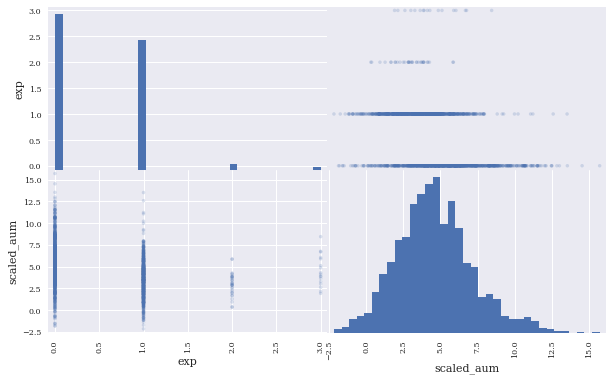

In [18]:
pd.plotting.scatter_matrix(data3,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

In [19]:
data4 = data2[['exp', 'beta']].dropna()

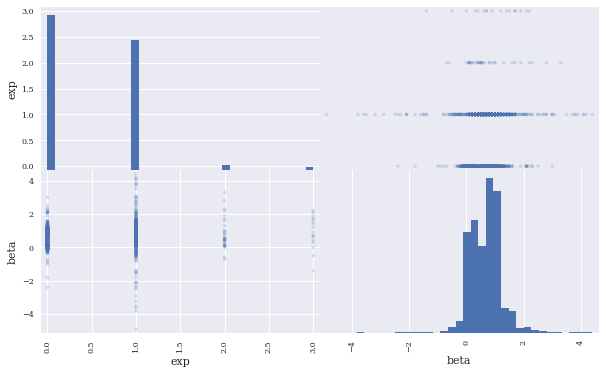

In [20]:
pd.plotting.scatter_matrix(data4,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

### OLS Regression

In [21]:
reg = np.polyfit(data3['exp'], data3['scaled_aum'], deg=1)  

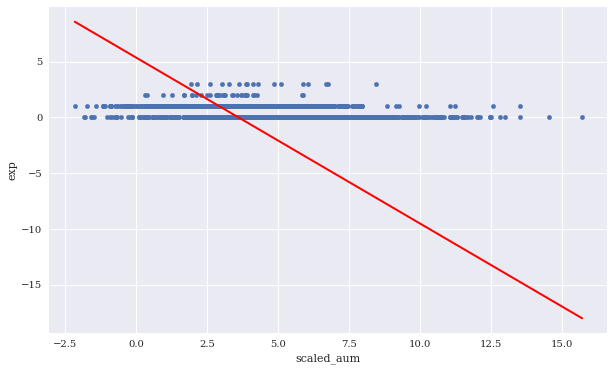

In [22]:
ax = data3.plot(kind='scatter', x='scaled_aum', y='exp', figsize=(10, 6))  
ax.plot(data3['scaled_aum'], np.polyval(reg, data3['scaled_aum']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

In [23]:
formula = 'exp ~ scaled_aum + beta'
results = smf.ols(formula, data2).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    exp   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.60e-58
Time:                        18:48:29   Log-Likelihood:                -1523.5
No. Observations:                1883   AIC:                             3053.
Df Residuals:                    1880   BIC:                             3070.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8011      0.028     28.448      0.0

### Correlation

In [24]:
data2.corr()  

,exp,scaled_aum,beta
exp,1.000000,-0.340716,0.105398
scaled_aum,-0.340716,1.000000,0.060314
beta,0.105398,0.060314,1.000000
